**Previous book**: <a href='./02_clustering.ipynb'>[Clustering]</a>

## Part 3: Topic Modelling
**NOTE**: This notebook expects <code>vector_articles.csv</code> from the <code>01_intro_and_vectorization.ipynb</code> notebook and <code>02_clustered_df.csv</code> from <code>02_clustering.ipynb</code> notebook.

In this part, we will apply topic modelling using NMF to interpret the cluster themes. We will then generate word clouds for each cluster to visually illustrate the dominant terms.

**Input**: <code>../data/models/vector_articles.csv</code> and <code>../data/interrim/02_clustered_df.csv</code>

**Output**: <code>../data/interrim/03_named_clustered_df.csv"</code>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.decomposition import NMF
from wordcloud import WordCloud

sns.set(style="whitegrid")

vect_article_df = pd.read_csv("../data/models/vector_articles.csv")
full_df = pd.read_csv("../data/interrim/02_clustered_df.csv")

# retrieve the cluster labels
clusters = full_df["Cluster"]
# retreive article features from the vectorized df
article_features = vect_article_df.columns.tolist()

### NMF
Non-Negative Matrix Factorization (NMF) is dimensionality reduction and feature extraction technique. NMF can represent a non-negative matrix such as a TF-IDF matrix as two lower ranked non-negative matrices.  This allows for a more compact representation of the original matrix. Terms from the original matrix can then be extracted from the new reduced vectors, with the terms with the highest weights being the most important for the topic.


NMF can be applied to the TF-IDF matrix selected by cluster, and the highest weight terms extracted.

These terms will form the basis of the topic name: 

In [2]:
topics = []

for label in range(7):
    nmf_model = NMF(n_components=1, random_state=2)
    nmf_model.fit_transform(vect_article_df[clusters == label])
    for topic in nmf_model.components_:
      top_words = [article_features[i] for i in topic.argsort()[:-20:-1]]
      topics.append(f"Cluster {label}: {', '.join(top_words)}")
topics


['Cluster 0: number, game, play, hand, make, letter, one, point, measur, exampl, valu, get, first, turn, piec, squar, place, line, time',
 'Cluster 1: ball, foot, hand, arm, back, leg, feet, bodi, shoulder, exercis, posit, keep, push, practic, move, get, forward, side, right',
 'Cluster 2: water, dri, remov, skin, clean, heat, make, cloth, cut, oil, wash, leav, minut, appli, may, grow, cup, add, rins',
 'Cluster 3: feel, person, like, say, make, talk, re, peopl, time, friend, tri, get, someth, thing, ask, think, help, know, might',
 'Cluster 4: hair, section, cut, oil, head, dri, brush, remov, wash, finger, style, end, make, side, color, part, look, skin, length',
 'Cluster 5: click, tap, select, app, menu, window, file, icon, screen, open, account, comput, text, page, http, ll, enter, option, search',
 'Cluster 6: fold, paper, end, make, side, tie, line, pull, edg, top, corner, draw, bottom, cm, cut, squar, inch, center, half']

From the terms extracted, the following topics we can give appropriate topics for each cluster:
<ul>
    <li>Cluster 0: Gaming and intellectual activities</li>
    <li>Cluster 1: Sports and physical activities</li>
    <li>Cluster 2: Hygiene and household tasks</li>
    <li>Cluster 3: Emotions and social interaction</li>
    <li>Cluster 4: Haircare </li>
    <li>Cluster 5: Technology</li>
    <li>Cluster 6: Crafts</li>
</ul>
These topics are consistent with previous findings.

The most compact cluster, Cluster 4, has one clear topic while the other clusters have broader topics. 

It is also clearer why there is some overlap between Cluster 4 and Cluster 2. Cluster 0, on the other hand, has the most ambigious topic and also the most inertia, and thus shows some degree of overlap with the other topics.

The other topics are consistent with the distribution in the t-SNE chart in the last part. For example, Cluster 0 overlaps with Cluster 1. This overlap is probably the result of Gaming and Sport having similar vocabularies (players, points, score etc).

### Word clouds
The different topics can be further explored with word clouds. A wold cloud is a way to visualize text data as a collection of words with the size of the words related to how important it is.

First write a function to produce the word clouds:

In [3]:
def cluster_word_cloud(cluster):
    topic_dict = {0: "games and intellect", 1: "sport and physical", 2: "hygiene and home", 3: "emotions and social", 4: "haircare", 5: "technology", 6: "crafts"}
    word_cloud_string = " ".join(full_df["Article"][clusters == cluster])
    word_cloud = WordCloud(
                    background_color="white",
                    max_font_size=40,
                    random_state=2
                          )
    word_cloud.generate(word_cloud_string)

    fig = plt.figure()
    fig.suptitle(f"Word cloud for Cluster {cluster} ({topic_dict[cluster]})")
    fig.subplots_adjust(top=2.4)
    plt.axis("off")

    plt.imshow(word_cloud, interpolation='bilinear')

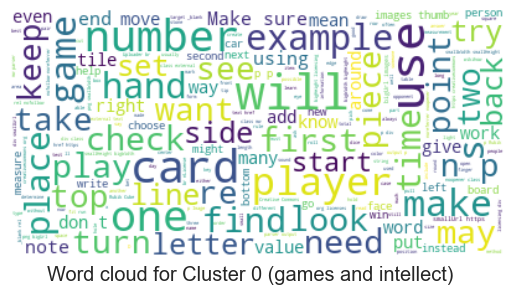

In [4]:
cluster_word_cloud(0)

The word cloud generated for Cluster 0 contains words consistent with games such "player", "card", "game" and "point". Intellectual activities is however quite broad and could include many different words.

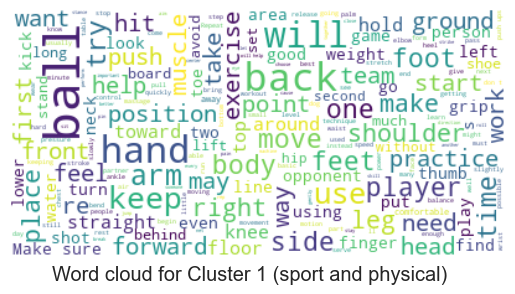

In [5]:
cluster_word_cloud(1)

Cluster 1's word cloud is also consistent with the topic of sport. As mentioned before, there is some overlap in topics with Cluster 0 between sports and games. It could have equally been possible to classify Sport and Games within the same cluster. There are also words related to the more abstract topic of 'physical activities'.

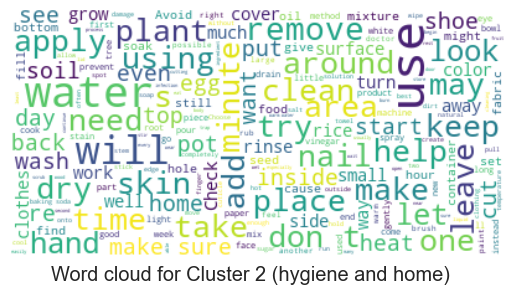

In [6]:
cluster_word_cloud(2)

Cluster 2 is one of the larger clusters, and as we can see in the word cloud, contains a few different topics. There are words related to plants such as "plant", "soil" and "seed", cooking such as "pot", "rice" and "heat", cleaning such as "clean", "surface" and "wash" and finally hygiene such as "skin", "rinse" and "soap". This explains why these articles were  clustered together and the limitations to this technique for topic modelling. All of the identified topics can be associated with the word "water".

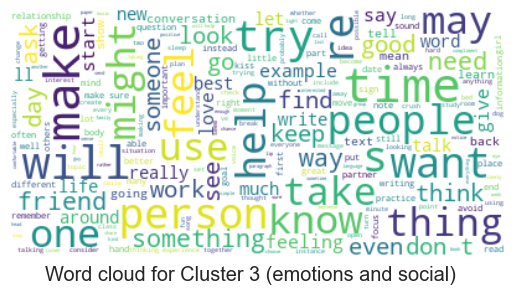

In [7]:
cluster_word_cloud(3)

Cluster 3 also has a word cloud consistent with the topics. "Person", "conversation" and "someone" are related to social, while "feel", "love" and "feeling" are the emotional words. It is also possible that some articles related to studying might be included in this topic from words like "focus", "writing" and "read" also being included.

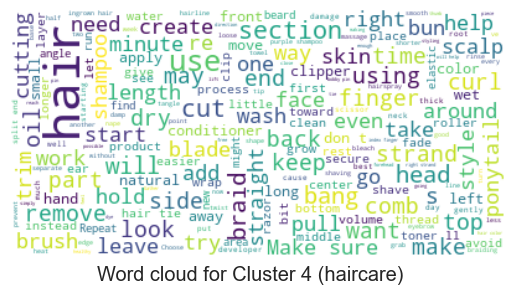

In [8]:
cluster_word_cloud(4)

Cluster 4 is the most compact cluster, and as such, the words in the word cloud reflect this. Most of the words are related to hair, but it also shows why there is an overlap with Cluster 2 with words such as "water", "oil" and "wash".  

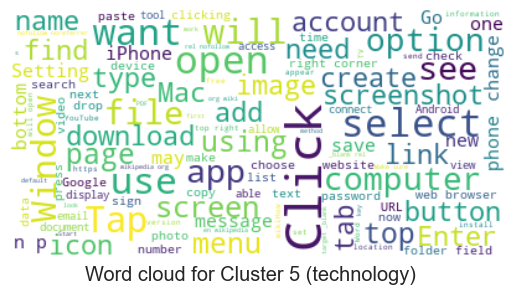

In [9]:
cluster_word_cloud(5)

Cluster 5 shows similar characteristics to Cluster 4. Most of the main words are related to the topic of computers and technology. 

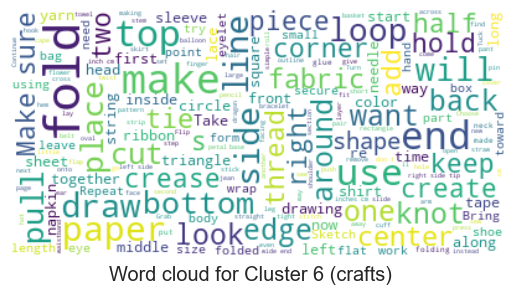

In [10]:
cluster_word_cloud(6)

Finally, Cluster 6 also looks fairly consistent. Most of the words in the cloud are related to crafts. The word "shoe" appears here and also in Cluster 2 partially explaining some of the overlap between those two clusters. 

### Topic Exploration
We can create a new dataframe with Cluster number and textual description of its topic:

In [11]:
cluster_dict = {
    "Cluster": [0, 1, 2, 3, 4, 5, 6],
    "Topic": ["Gaming and Intellectual",
             "Sports and Physical", 
             "Hygiene and Home",
             "Emotions and Social",
             "Haircare",
             "Technology",
             "Crafts"]} 
named_clusters = pd.DataFrame.from_dict(cluster_dict)

Add the labels to the main dataframe:

In [12]:
full_df = full_df.merge(named_clusters, how="left", on="Cluster")

#### Topic popularity
Summary statistics for each cluster:

In [13]:
grouped_df = full_df.groupby(["Cluster", "Topic"])["Views"].agg(["mean", "std", "median", "min",  "max"]).round()

In [14]:
grouped_df

,,mean,std,median,min,max
Cluster,Topic,,,,,
0,Gaming and Intellectual,1707421.0,2135632.0,958816.0,8608,18211159
1,Sports and Physical,2260737.0,2254161.0,1516881.0,231386,11479129
2,Hygiene and Home,1951283.0,2272776.0,1272714.0,8335,14095662
3,Emotions and Social,3446782.0,4903071.0,1949248.0,9732,33291709
4,Haircare,2157478.0,2585626.0,1239422.0,33690,13827488
5,Technology,1861918.0,4201914.0,700770.0,9965,35602414
6,Crafts,1274549.0,1129950.0,898513.0,145490,5753237


From the summary statistics, we can see that Cluster 3, *Emotions and Social*, is the most popular. However, there is huge variaton in how many views an article may get.

Examine the histogram for views:

Text(0.5, 1.0, 'Distribution of articles by number of views')

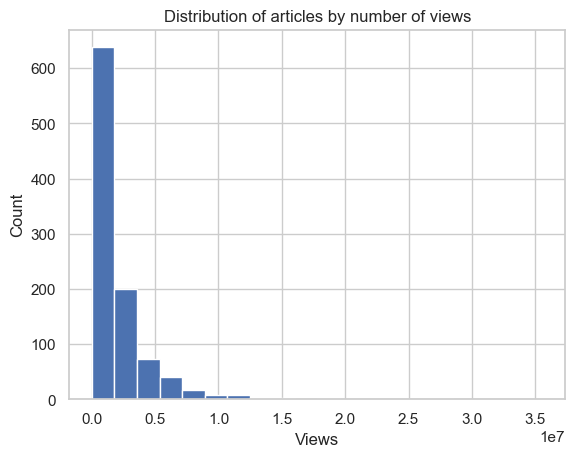

In [15]:
sns.histplot(full_df["Views"], bins=20, alpha=1)
plt.xlabel("Views")
plt.title("Distribution of articles by number of views")

The histrogram shows that the data is very skewed. Most articles get between 0 and 5 million views, but there are some extreme outliers, with the top article receiving over 35 million views.

To more accurately compare the popularity of each cluser, we should use boxplots which are less sensitive to outliers:

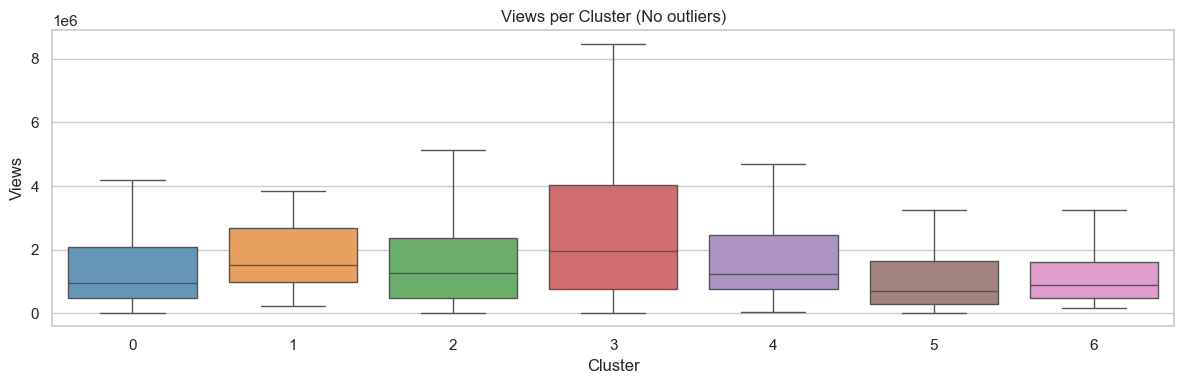

In [16]:
# Consistent colours for each cluster
cluster_colours = ["#5799C6", "#FE9E4B", "#60B961", "#E05D5E", "#AF8CCC", "#A87F77", "#E992CE"]
clusters_sorted = sorted(full_df["Cluster"].unique())
cluster_palette = dict(zip(clusters_sorted, cluster_colours))

plt.figure(figsize=(12, 4))
sns.boxplot(data=full_df, x="Cluster", y="Views", hue="Cluster", showfliers=False, legend=False, palette=cluster_palette)

plt.title('Views per Cluster (No outliers)')
plt.xlabel("Cluster")
plt.ylabel("Views")
plt.tight_layout()
plt.show()

The boxplots show that Cluster 3, *Emotions and Social*, is the most popular topic. It also has the largest about of spread.

There is not a great deal of difference between the remaining clusters. We can see that Cluster 5, *Technology* has the lowest median for views, but the difference does not stand out.

#### Future plans

There are a lot of insights to be gained by examining the topics more closely.

In the future, we can investigate:

<ul>
    <li>Top article in each cluster.</li>
    <li>The prototypical article of each cluser (the one closest to the centroid).</li>
    <li>Which articles are outliers appearing at the edge of clusters.</li>
    <li>If atypical clusters get more views than those typical for the cluster.</li>
</ul>

However, these questions are not essential to the core narrative and may distract from the main purpose of the investigation. Therefore, I will leave this note, and return to this in the future when the main project is complete. 

### Summary
In this part, we

<ul>
    <li>Used NMF to uncover the topic of each cluster.</li>
    <li>Generated word clouds to visualize the topics.</li>
    <li>Began to investigate the connections between topics and article characteristics.</li>
</ul>

In the next part, we will investigate the similarity between articles and construct a graph to see how topics are laid out.

Save a copy of the up-to-date dataframe as CSV:

In [17]:
full_df.to_csv("../data/interrim/03_named_clustered_df.csv", index=False)

### Navigation
**Previous book**: <a href='./02_clustering.ipynb'>[Clustering]</a>

**Next book**: <a href='./04_article_similarity.ipynb'>[Article Similarity]</a>